In [1]:
from cnn.model import build_net

from spleen_dataset.dataloader import SpleenDataloader, SpleenDataset, get_training_augmentation, get_validation_augmentation
from spleen_dataset.config import dataset_folder
from spleen_dataset.utils import get_split_deterministic, get_list_of_patients

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import random
import numpy as np

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], False)
  except RuntimeError as e:
    print(e)

2022-10-09 10:39:55.078897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 10:39:55.124337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 10:39:55.124472: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
patients = get_list_of_patients(dataset_folder)

In [3]:
patch_size = (128, 128)
batch_size = 32
num_classes = 2
train_augmentation = get_training_augmentation(patch_size)
val_augmentation = get_validation_augmentation(patch_size)

net_list = [
    'downscaling_vgg_3', 
    'downscaling_vgg_3',
    'downscaling_vgg_3',
    'downscaling_vgg_3',
    'downscaling_vgg_3',
    'downscaling_vgg_3',
    'downscaling_vgg_3',
    'downscaling_vgg_3',
    'downscaling_vgg_3'
]

fn_dict = {
    'downscaling_vgg_3': {'cell': 'DownscalingCell', 'block': 'VGGBlock', 'kernel': 3, 'prob': 1/3},
    'upscaling_vgg_3':   {'cell': 'UpscalingCell',   'block': 'VGGBlock', 'kernel': 3, 'prob': 1/3},
    'nonscaling_vgg_3':  {'cell': 'NonscalingCell',  'block': 'VGGBlock', 'kernel': 3, 'prob': 1/3},
}

/home/guilherme/git/segqnas/.venv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


2022-10-09 10:40:22.488992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-09 10:40:22.489534: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 10:40:22.489690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 10:40:22.489786: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Epoch 1/50


2022-10-09 10:40:28.319079: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-10-09 10:40:29.389544: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


26/26 [==============================] - 26s 525ms/step - loss: 0.7703 - gen_dice_coef: 0.2828 - soft_gen_dice_coef: 0.2540 - val_loss: 0.6919 - val_gen_dice_coef: 0.3464 - val_soft_gen_dice_coef: 0.3330 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 13s 498ms/step - loss: 0.4361 - gen_dice_coef: 0.6004 - soft_gen_dice_coef: 0.5892 - val_loss: 0.3424 - val_gen_dice_coef: 0.6927 - val_soft_gen_dice_coef: 0.6831 - lr: 9.8378e-04
Epoch 3/50
26/26 [==============================] - 13s 503ms/step - loss: 0.3359 - gen_dice_coef: 0.6966 - soft_gen_dice_coef: 0.6897 - val_loss: 0.3488 - val_gen_dice_coef: 0.6871 - val_soft_gen_dice_coef: 0.6769 - lr: 9.6753e-04
Epoch 4/50
26/26 [==============================] - 13s 512ms/step - loss: 0.2867 - gen_dice_coef: 0.7459 - soft_gen_dice_coef: 0.7391 - val_loss: 0.2347 - val_gen_dice_coef: 0.7999 - val_soft_gen_dice_coef: 0.7912 - lr: 9.5125e-04
Epoch 5/50
26/26 [==============================] - 13s 506ms/step - loss: 0.2336 - gen

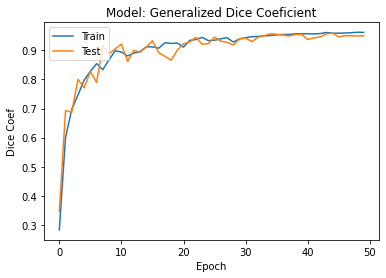

Epoch 1/50
26/26 [==============================] - 17s 526ms/step - loss: 0.9404 - gen_dice_coef: 0.0969 - soft_gen_dice_coef: 0.0832 - val_loss: 0.7540 - val_gen_dice_coef: 0.3450 - val_soft_gen_dice_coef: 0.2696 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 15s 559ms/step - loss: 0.5672 - gen_dice_coef: 0.5143 - soft_gen_dice_coef: 0.4565 - val_loss: 0.4258 - val_gen_dice_coef: 0.6095 - val_soft_gen_dice_coef: 0.5985 - lr: 9.8378e-04
Epoch 3/50
26/26 [==============================] - 15s 573ms/step - loss: 0.4227 - gen_dice_coef: 0.6113 - soft_gen_dice_coef: 0.6021 - val_loss: 0.4669 - val_gen_dice_coef: 0.5602 - val_soft_gen_dice_coef: 0.5583 - lr: 9.6753e-04
Epoch 4/50
26/26 [==============================] - 14s 550ms/step - loss: 0.3768 - gen_dice_coef: 0.6549 - soft_gen_dice_coef: 0.6483 - val_loss: 0.3948 - val_gen_dice_coef: 0.6366 - val_soft_gen_dice_coef: 0.6304 - lr: 9.5125e-04
Epoch 5/50
26/26 [==============================] - 14s 523ms/step - loss: 0

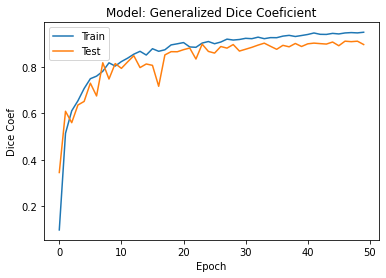

KeyboardInterrupt: 

In [4]:
val_gen_dice_coef_list = []
num_splits = 5
num_initializations = 3
epochs = 50
evaluation_epochs = int(0.2 * epochs)

for initialization in range(num_initializations):

    for fold in range(num_splits):
        train_patients, val_patients = get_split_deterministic(patients, fold=fold, num_splits=num_splits, random_state=initialization)

        train_dataset = SpleenDataset(train_patients, only_non_empty_slices=True)
        val_dataset = SpleenDataset(val_patients, only_non_empty_slices=True)

        train_dataloader = SpleenDataloader(train_dataset, batch_size, train_augmentation)
        val_dataloader = SpleenDataloader(val_dataset, batch_size, val_augmentation)

        model = build_net((*patch_size, 1), num_classes, fn_dict, net_list)
 
        def learning_rate_fn(epoch):
            initial_learning_rate = 1e-3
            end_learning_rate = 1e-4
            power = 0.9
            return ((initial_learning_rate - end_learning_rate) *
                (1 - epoch / float(epochs)) ** (power)
                ) + end_learning_rate
            
        lr_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_fn, verbose=False)

        history = model.fit(
            train_dataloader,
            validation_data=val_dataloader,
            epochs=epochs,
            verbose=1,
            callbacks=[
                lr_callback
            ]
        )
        
        print(history.history['val_gen_dice_coef'][-evaluation_epochs:])

        val_gen_dice_coef_list.extend(history.history['val_gen_dice_coef'][-evaluation_epochs:])

        # for patient in val_patients:
        #     patient_dataset = SpleenDataset([patient], only_non_empty_slices=True)
        #     patient_dataloader = SpleenDataloader(patient_dataset, 1, val_augmentation, shuffle=False)
        #     results = model.evaluate(patient_dataloader)
        #     val_gen_dice_coef_patient = results[-1]
        #     val_gen_dice_coef_list.append(val_gen_dice_coef_patient)

        #plotting the dice coef results (accuracy) as a function of the number of epochs
        plt.figure()
        plt.plot(history.history['gen_dice_coef'])
        plt.plot(history.history['val_gen_dice_coef'])
        plt.title('Model: Generalized Dice Coeficient')
        plt.ylabel('Dice Coef')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

        #plotting the dice coef results (loss function) as a function of the number of epochs
        # plt.figure()
        # plt.plot(history.history['loss'])
        # plt.plot(history.history['val_loss'])
        # plt.title('Model: Generalized Dice Coeficient')
        # plt.ylabel('Dice Loss')
        # plt.xlabel('Epoch')
        # plt.legend(['Train', 'Test'], loc='upper right')
        # plt.show()

mean_val_gen_dice_coef = (np.mean(val_gen_dice_coef_list))
std_val_gen_dice_coef = (np.std(val_gen_dice_coef_list))

print(f'Dice {mean_val_gen_dice_coef} +- {std_val_gen_dice_coef}')

In [ ]:
#!tensorboard --logdir='./logs'